In [1]:
from tilt import tilt
import torch
from torch.optim import Optimizer
from torch import autograd
import matplotlib.pyplot as plt
import tilt
import numpy as np
from run_mnist import run_mnist

In [2]:
best_optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

NameError: name 'model' is not defined

In [2]:
def pretty_plot_trajectory(list_of_xs_ys, color='b', label=''):
    xs, ys = zip(*list_of_xs_ys)
    plt.plot(xs, ys, color='k', marker = 'o', markersize=12,
             linewidth=1, markerfacecolor=color, markeredgecolor=color,
            alpha=0.9, label=label)
    
def optim_curve(optims, objective):
    """plots the convergence curve for the tilt optimizer 
    for the given objective function"""    
    x = autograd.Variable(torch.FloatTensor([0, 3]).resize_(2, 1), requires_grad=True)
    optimizer = tilt.tilt([{'params': x, 'lr':optims['lr1']}], lr=optims['lr2'], mu=optims['mu'],
                          tau=optims['tau'], beta=optims['beta'])
    param_history = []
    for i in range(100):
        param_history.append((float(x.data[0]), float(x.data[1])))
        x.grad = None
        y = objective(x)
        y.backward()
        #print('gradient of x is {} while x itself is {}'.format(x.grad, x))
        optimizer.step()
        #optimizer = torch.optim.Adam([{'params': x, 'lr':0.1}])
    return param_history

def plot_optim_curve(optims, objective, color='C1'):
    results = optim_curve(optims, objective)
    pretty_plot_trajectory(results, color=color, label='Tilt')
    xlims = plt.gca().get_xlim()
    ylims = plt.gca().get_ylim()
    print(xlims, ylims)
    plot_2d_contours(objective, xlims, ylims)
    plt.show()

def plot_2d_contours(objective, xlims=[-1, 1], ylims=[-1, 1]):
    delta = 0.01
    x = np.arange(xlims[0], xlims[1], delta)
    y = np.arange(ylims[0], ylims[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = X * 0
    for i, row in enumerate(X):
        for j, _ in enumerate(row):
            Z[i, j] = float(objective(torch.autograd.Variable(torch.FloatTensor((float(X[i, j]), float(Y[i, j]))).view((2, 1)))))
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    CS = plt.contour(X, Y, Z, levels=[0.1, 0.5, 1, 2, 3, 6, 9, 12, 15, 18])
    plt.clabel(CS, inline=1, fontsize=10)
    
def adam_optim_curve(optims, objective):
    """plots the convergence curve for the tilt optimizer 
    for the given objective function"""    
    x = autograd.Variable(torch.FloatTensor([0, 3]).resize_(2, 1), requires_grad=True)
    optimizer = torch.optim.Adam([{'params': x, 'lr':optims['lr'], 'betas':optims['betas']}])
    param_history = []
    for i in range(100):
        param_history.append((float(x.data[0]), float(x.data[1])))
        x.grad = None
        y = objective(x)
        y.backward()
        #print('gradient of x is {} while x itself is {}'.format(x.grad, x))
        optimizer.step()
        #optimizer = torch.optim.Adam([{'params': x, 'lr':0.1}])
    return param_history

def plot_adam_optim_curve(optims, objective, color='C2'):
    results = adam_optim_curve(optims, objective)
    pretty_plot_trajectory(results, color=color, label='Adam')
    plt.show()

(-1.2611340880393982, 0.060054004192352295) (-0.15000000000000002, 3.15)


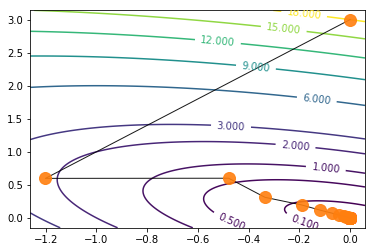

In [3]:
def f(z):
    """This is a quadratic potential, with a characteristic matrix 
    2 1
    1 2. It has a minimum at the origin."""
    T = autograd.Variable(torch.FloatTensor([[2, 1], [1, 2]]))
    intermediate = torch.matmul(z.t(), T)
    return torch.matmul(intermediate, z).sum()

x = autograd.Variable(torch.FloatTensor([0, 3]).resize_(2, 1), requires_grad=True)
optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.999, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

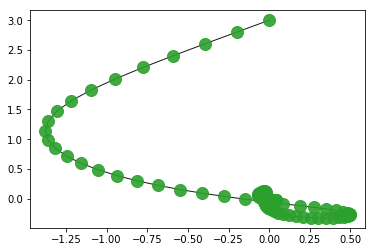

In [4]:
optims = {'betas': [0.9, 0.99], 'lr': 0.2}

x = autograd.Variable(torch.FloatTensor([0, 3]).resize_(2, 1), requires_grad=True)

plot_adam_optim_curve(optims, f)

## How does the tilt curve change as we adjust the parameters of the optimizer?

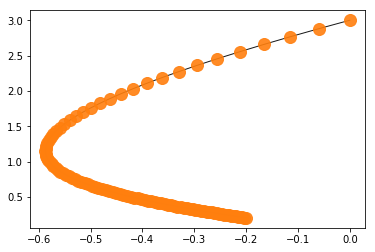

In [6]:
# Lowering the learning rate
optims = {'lr1': 0.1, 'mu': 0.9, 'tau': 0.999, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

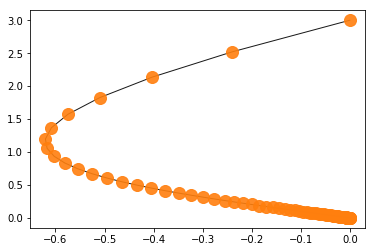

In [7]:
# Lowering mu
optims = {'lr1': 0.1, 'mu': 0.6, 'tau': 0.999, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

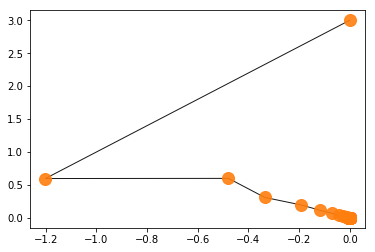

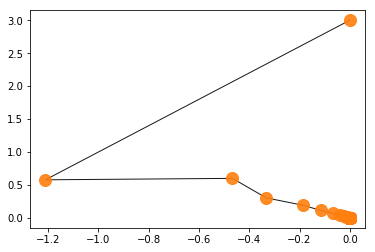

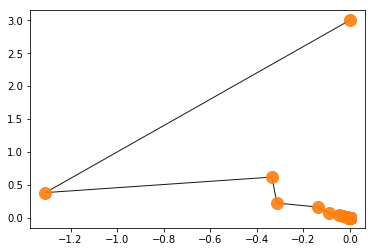

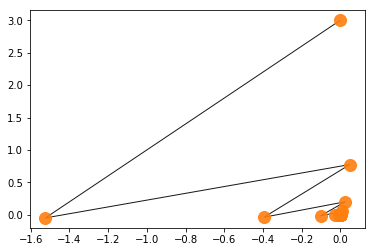

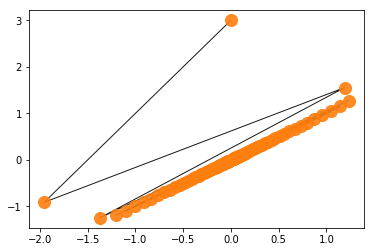

In [8]:
# Lowering tau: starting at high tau
# This makes the dynamics less tilt-dominated
optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.999, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.99, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.9, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.7, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

# Here the high learning rate is too much for the little tile we get
optims = {'lr1': 2, 'mu': 0.9, 'tau': 0.3, 'beta': 0.9, 'lr2': 0.1}
plot_optim_curve(optims, f)

(-1.7139600098133088, 0.3531601011753082) (-0.4020000100135803, 3.162000000476837)


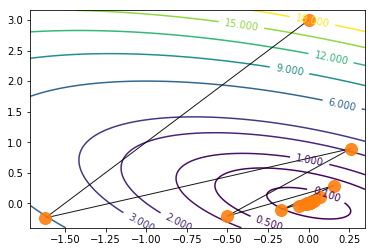

(-1.3229999899864198, 0.06299999952316285) (-0.15000000000000002, 3.15)


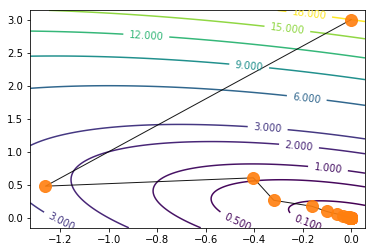

In [15]:
# Lowering beta: starting at high beta
# This makes the dynamics less tilt-dominated
optims = {'lr1': 0.3, 'mu': 0.1, 'tau': 0, 'beta': 0, 'lr2': 0.01}
plot_optim_curve(optims, f)

optims = {'lr1': 0.3, 'mu': 0.3, 'tau': 0, 'beta': 0, 'lr2': 0.01}
plot_optim_curve(optims, f)

In [42]:
num_epochs = 30
optim_params = {'lr': 0.2, 'mu':0.2, 'tau': 0.9, 'beta': 1}
train, test, test_accs = run_mnist('tilt', optim_params=optim_params, epochs=num_epochs)

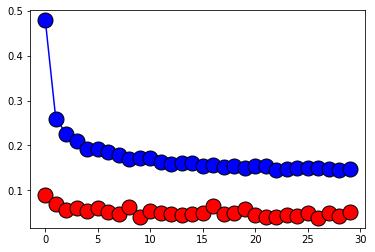

In [43]:
fig, ax = plt.subplots()
ax.plot(np.arange(num_epochs), train, 'bo-', markersize=15, 
         markeredgecolor='k')
ax.plot(np.arange(num_epochs), test, 'ro-', markersize=15, 
         markeredgecolor='k')
plt.show()

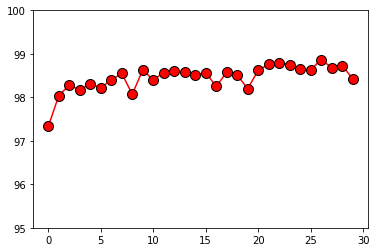

In [44]:
fig, ax = plt.subplots()
ax.plot(np.arange(num_epochs), test_accs, 'ro-', markersize=10, 
         markeredgecolor='k')
ax.set_ylim([95, 100])
plt.show()